
Crystal properties

                    CIF file:  /home/spc93/spc_cifs/nchem.2848-s4.cif
                     Lattice:  10.277 4.643 11.285 90.00 92.48 90.00
                   All sites:  C1, H1A, H1B, H1C, C2, C3, H3, C4, C5, H5A, H5B, H5C, O1, O2, Cu1
               Site selected:  Cu1
                 Site vector:  0.500 0.500 0.500
       No. of spacegroup ops:  4
      No. of sym ops at site:  2
 No. of equiv. sites in cell:  2
   No. of pg ops for crystal:  4

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 0.0]
                Site allowed:  Yes
   Structure factor for site:  2.00+0.00i
          Spacegroup allowed:  Yes
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either


<IPython.core.display.Javascript object>


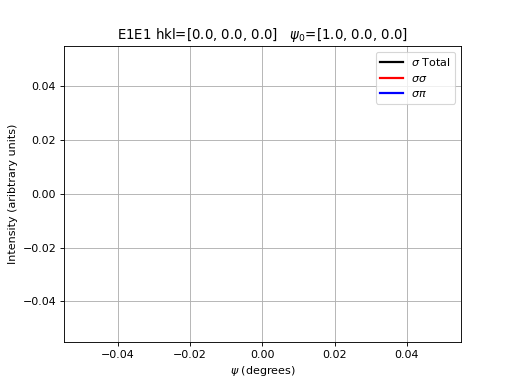


Tensor components

         Crystal (spherical):   [ 0.064+0.j  0.781-0.j  1.   +0.j -0.781-0.j  0.064-0.j] 
            Atom (spherical):   [ 0.064+0.704j  0.781+0.279j  1.   +0.j    -0.781+0.279j  0.064-0.704j] 
  Struct. factor (spherical):   [ 0.064+0.j  0.781-0.j  1.   +0.j -0.781-0.j  0.064-0.j] 

Crystal (Cartesian):

[[-1.247+0.j -0.   +0.j  2.833+0.j]
 [-0.   +0.j -1.714+0.j  0.   +0.j]
 [ 2.833+0.j  0.   +0.j  2.961+0.j]] 

Atom (Cartesian):

[[-0.624+0.j -1.276+0.j  1.416+0.j]
 [-1.276+0.j -0.857+0.j -0.505+0.j]
 [ 1.416+0.j -0.505+0.j  1.481+0.j]] 

Struct. factor (Cartesian):

[[-0.421+0.j -0.   +0.j  0.957+0.j]
 [-0.   +0.j -0.579+0.j  0.   +0.j]
 [ 0.957+0.j  0.   +0.j  1.   +0.j]] 



In [24]:
import TensorScatteringClass as ten
import numpy as np

from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D ########## was not previously required!!
%matplotlib notebook 

#t=ten.TensorScatteringClass(CIFfile='/home/spc93/spc_cifs/nchem.2848-s6.cif', Site='Cu1');
t=ten.TensorScatteringClass(CIFfile='/home/spc93/spc_cifs/nchem.2848-s4.cif', Site='Cu1');

t.PlotIntensityInPolarizationChannels('E1E1', lam=1, hkl=np.array([0,0,0]), hkln=np.array([1,0,0]), K=2, Time=1, Parity=1, mk=None, lk=None, sk=None, sigmapi='sigma')
t.print_tensors()

In [2]:
T = t.Tc_crystal

U=np.eye(3) # U matrix for orientation of crystal on pin

def Rz(x):
    return np.array([[np.cos(x), -np.sin(x), 0],[np.sin(x), np.cos(x), 0],[0, 0, 1]])

def Rx(x):
    return np.array([[1, 0, 0], [0, np.cos(x), -np.sin(x)],[0, np.sin(x), np.cos(x)]])


In [25]:
#chi, phi = np.pi, 0

chim, phim = np.meshgrid(np.arange(0, 90, 5), np.arange(0, 360,5))

def mu(chim, phim):
    mu = chim * 0.0
    for i in range(chim.shape[0]):
        for j in range(chim.shape[1]):
            chi, phi = chim[i,j]*np.pi/180, phim[i,j]*np.pi/180
            R = Rz(chi).dot(Rx(phi))
            RU = R.dot(U)
            Trot = (RU.dot(T)).dot(RU.T)
            mu[i, j] = Trot[0,0]
            #print mu[i, j]
    return mu

mum = mu(chim, phim)           

/dls_sw/apps/python/anaconda/1.7.0/64/envs/cctbx/lib/python2.7/site-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


<IPython.core.display.Javascript object>


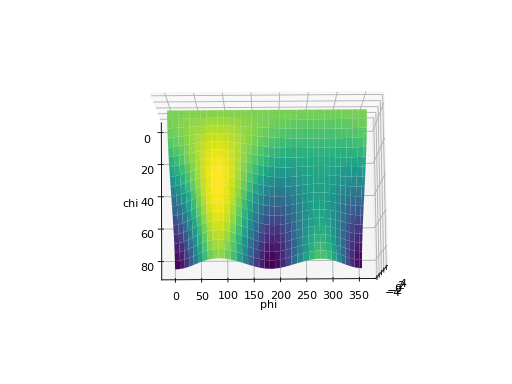

Text(0.5,0,u'phi')

In [30]:
figure(); 
gca(projection='3d').plot_surface(chim, phim, mum, cmap='viridis') 
xlabel('chi'); ylabel('phi')

In [27]:
viridis

<function matplotlib.pyplot.viridis>

In [6]:
chim, phim = np.meshgrid(np.arange(0, 90, 1), np.arange(0, 360,1))

In [7]:
Rz(chim).shape[0]

3

In [16]:
T

array([[ 2.686+0.j,  0.   +0.j,  2.092+0.j],
       [ 0.   +0.j, -5.177+0.j,  0.   +0.j],
       [ 2.092+0.j,  0.   +0.j,  2.491+0.j]])